In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
os.listdir('/Users/alecclarkfeather/Downloads/store_forecast/')

['test.csv', 'train.csv', 'sample_submission.csv']

In [4]:
train_df = pd.read_csv('/Users/alecclarkfeather/Downloads/store_forecast/train.csv')
train_df.head(15)

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240
5,5,2017-01-01,Belgium,KaggleRama,Kaggle Getting Started,187
6,6,2017-01-01,Belgium,KaggleRama,Kaggle Recipe Book,158
7,7,2017-01-01,Belgium,KaggleRama,Kaggle for Kids: One Smart Goose,267
8,8,2017-01-01,France,KaggleMart,Kaggle Advanced Techniques,610
9,9,2017-01-01,France,KaggleMart,Kaggle Getting Started,463


In [5]:
test_df = pd.read_csv('/Users/alecclarkfeather/Downloads/store_forecast/test.csv')
test_df.head(15)

,row_id,date,country,store,product
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques
5,70133,2021-01-01,Belgium,KaggleRama,Kaggle Getting Started
6,70134,2021-01-01,Belgium,KaggleRama,Kaggle Recipe Book
7,70135,2021-01-01,Belgium,KaggleRama,Kaggle for Kids: One Smart Goose
8,70136,2021-01-01,France,KaggleMart,Kaggle Advanced Techniques
9,70137,2021-01-01,France,KaggleMart,Kaggle Getting Started


In [6]:
sample_df = pd.read_csv('/Users/alecclarkfeather/Downloads/store_forecast/sample_submission.csv')
sample_df.head(15)

,row_id,num_sold
0,70128,100
1,70129,100
2,70130,100
3,70131,100
4,70132,100
5,70133,100
6,70134,100
7,70135,100
8,70136,100
9,70137,100


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    70128 non-null  int64 
 1   date      70128 non-null  object
 2   country   70128 non-null  object
 3   store     70128 non-null  object
 4   product   70128 non-null  object
 5   num_sold  70128 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 3.2+ MB


In [8]:
train_df['country'].unique()

array(['Belgium', 'France', 'Germany', 'Italy', 'Poland', 'Spain'],
      dtype=object)

In [9]:
train_df['store'].unique()

array(['KaggleMart', 'KaggleRama'], dtype=object)

In [10]:
train_df['product'].unique()

array(['Kaggle Advanced Techniques', 'Kaggle Getting Started',
       'Kaggle Recipe Book', 'Kaggle for Kids: One Smart Goose'],
      dtype=object)

In [11]:
train_df['date'].min()

'2017-01-01'

In [12]:
train_df['date'].max()

'2020-12-31'

In [13]:
train_df['date'].nunique()

1461

In [14]:
train_df.shape

(70128, 6)

Belgium
Belgium KaggleMart


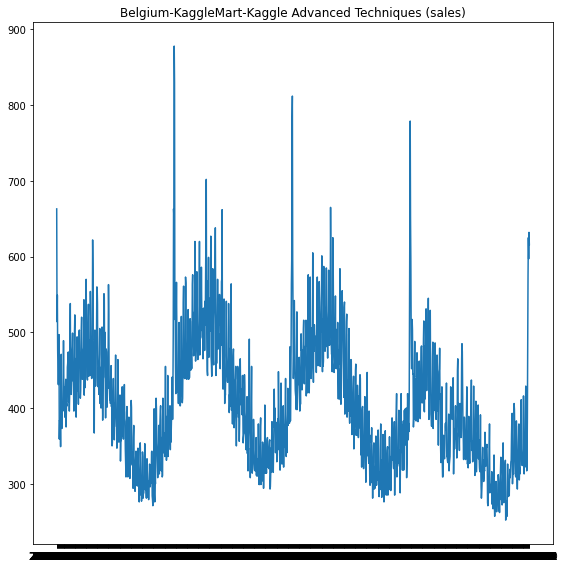

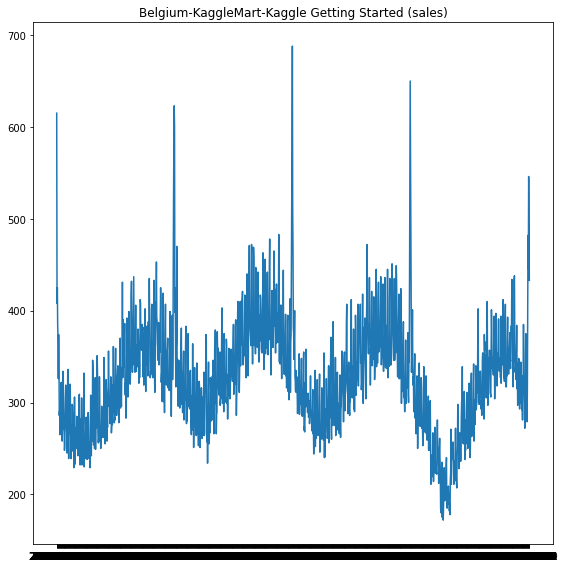

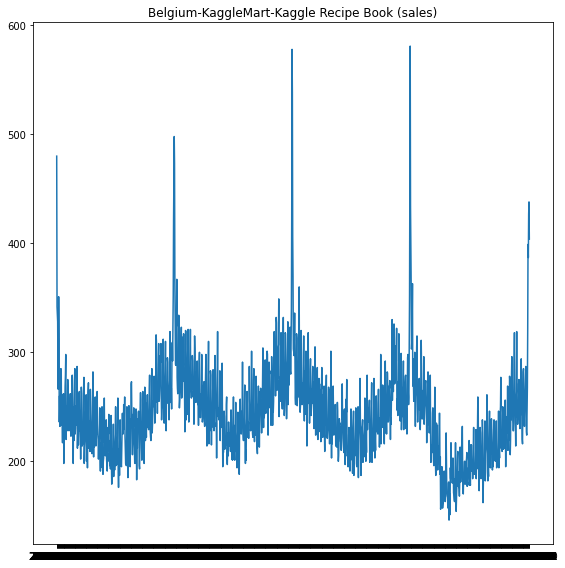

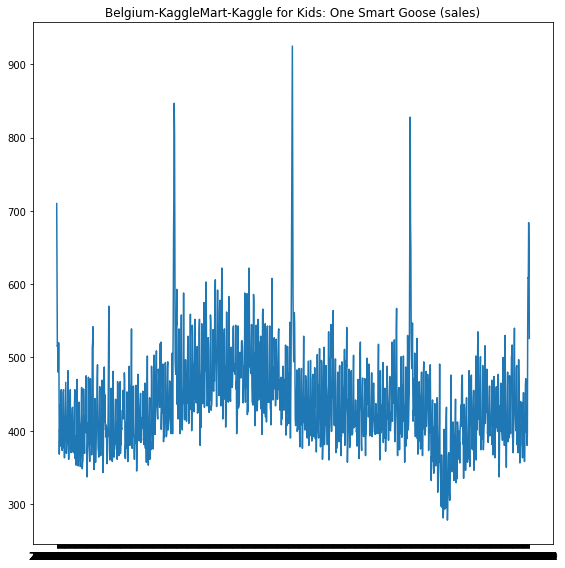

Belgium KaggleRama


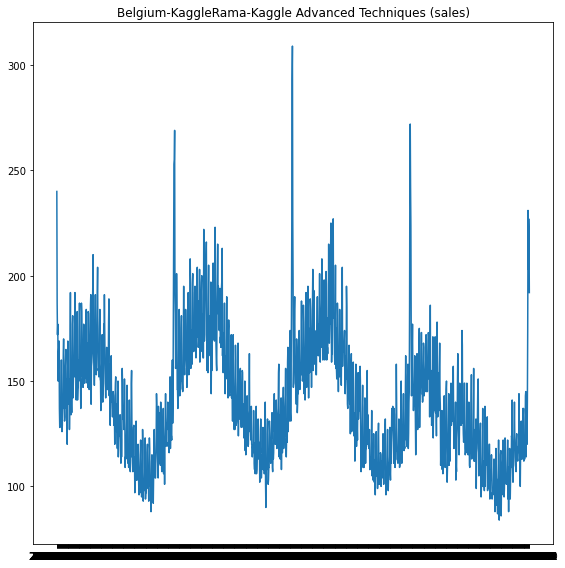

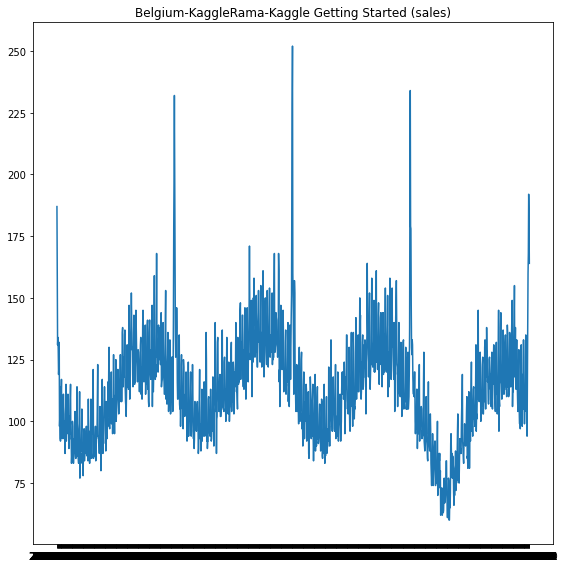

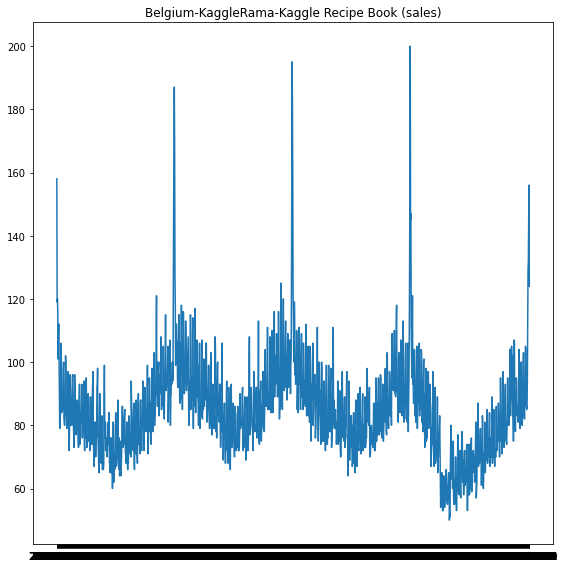

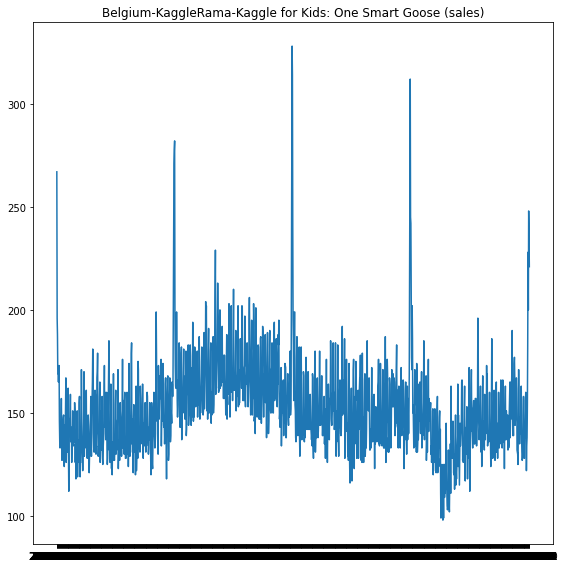

France
France KaggleMart


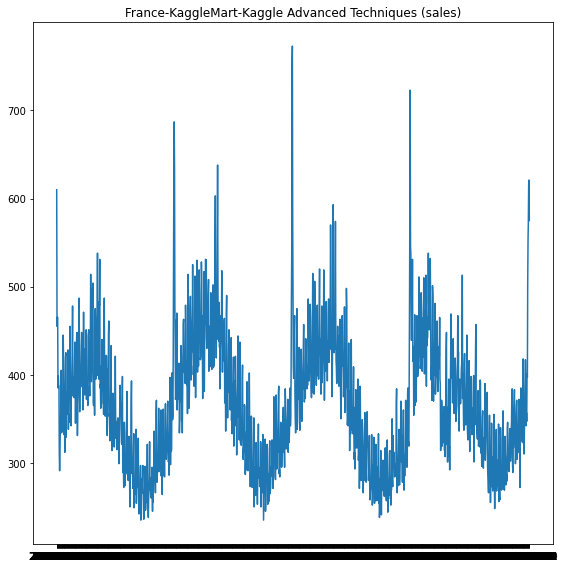

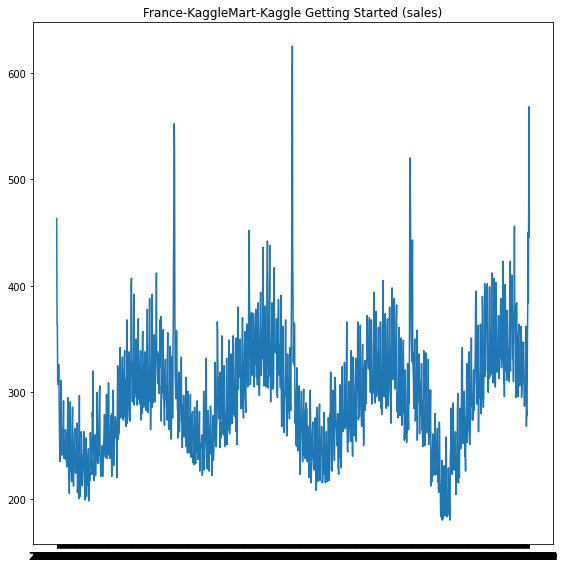

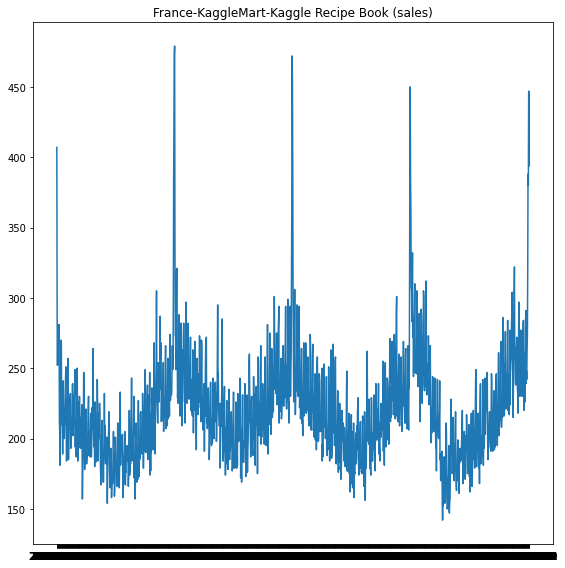

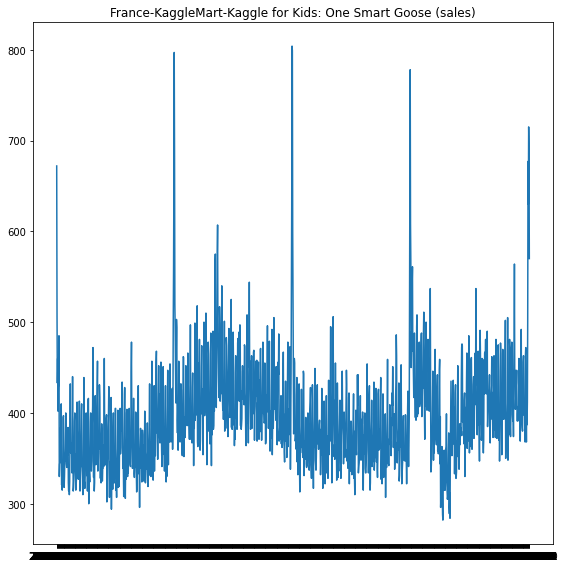

France KaggleRama


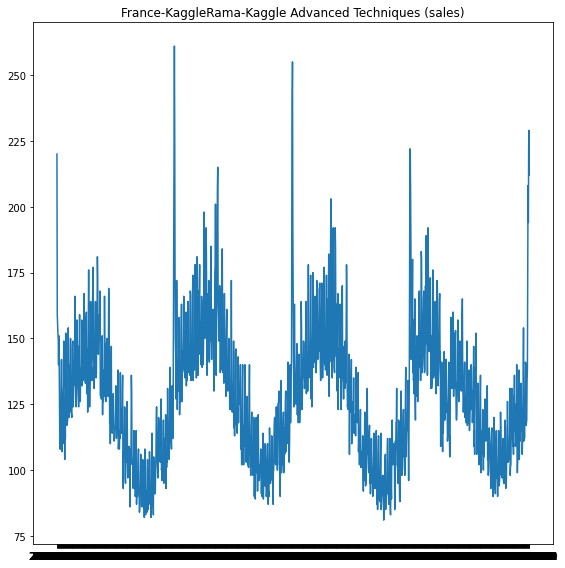

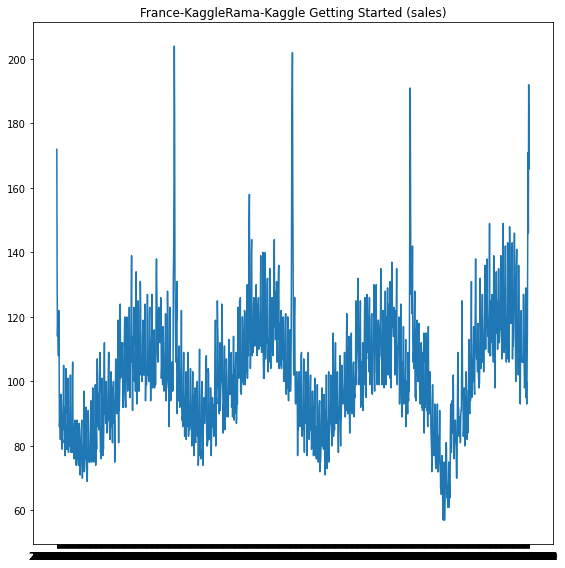

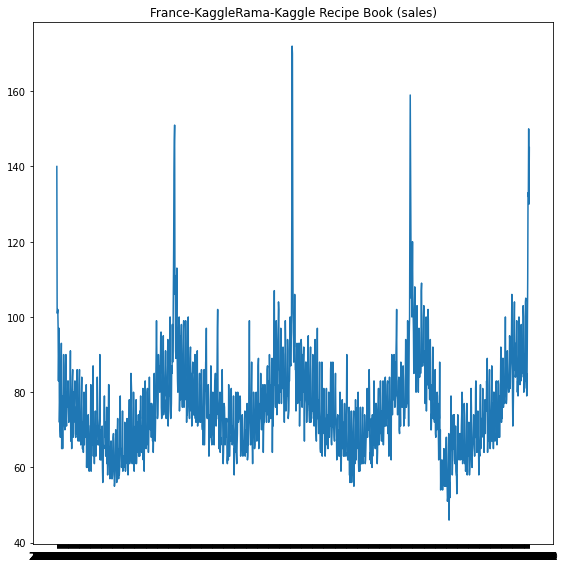

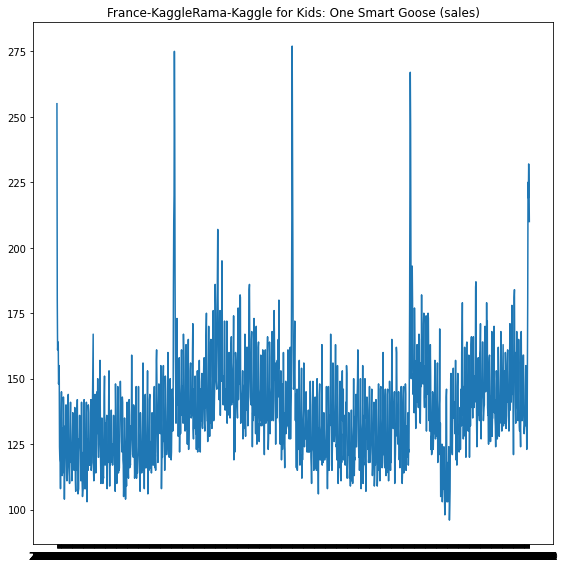

Germany
Germany KaggleMart


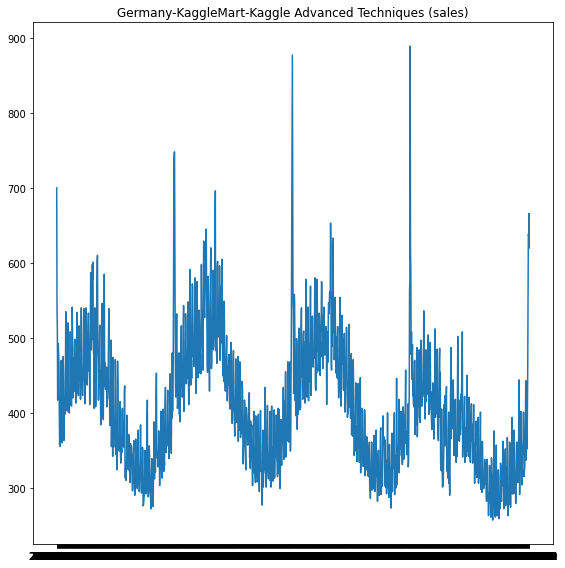

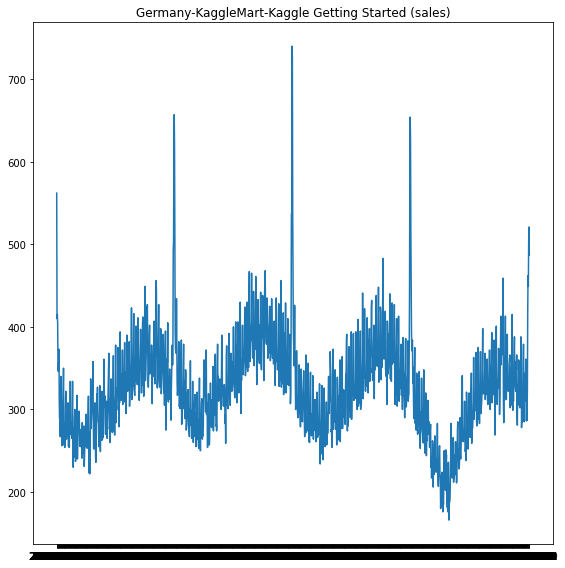

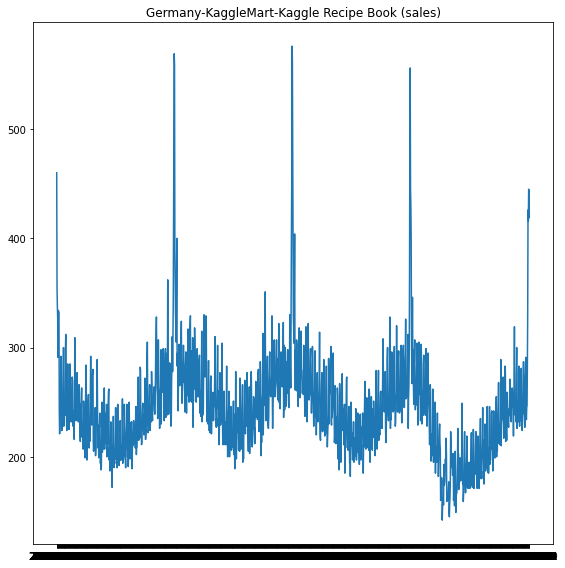

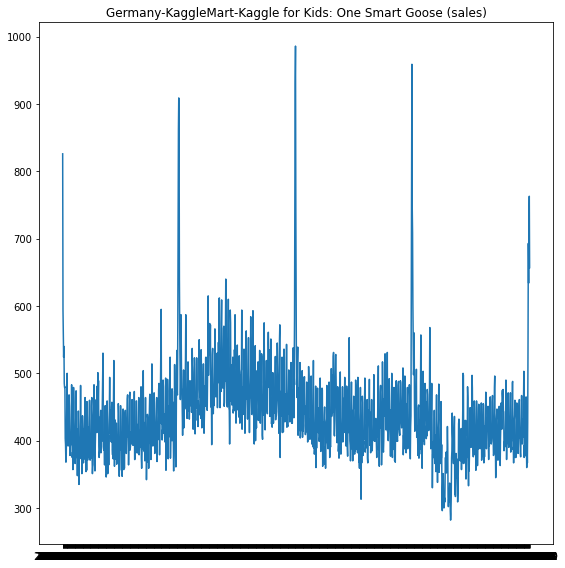

Germany KaggleRama


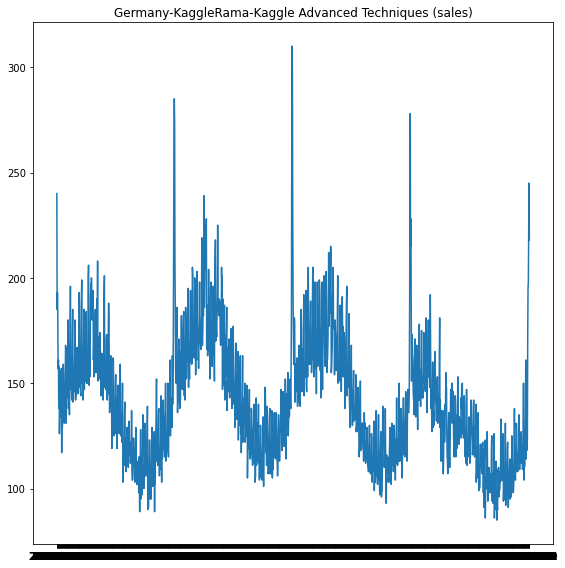

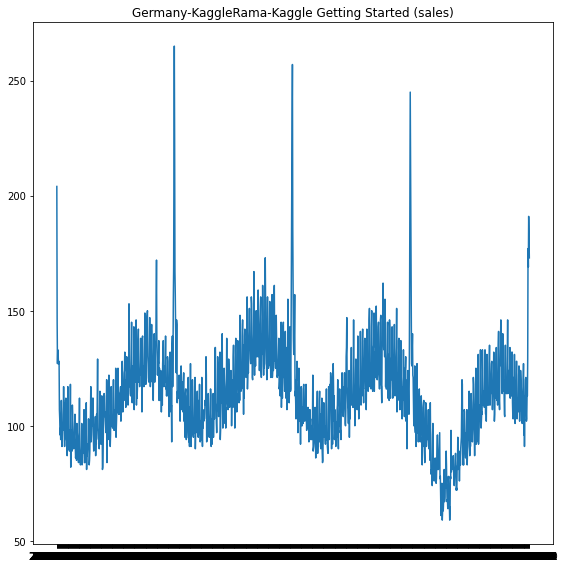

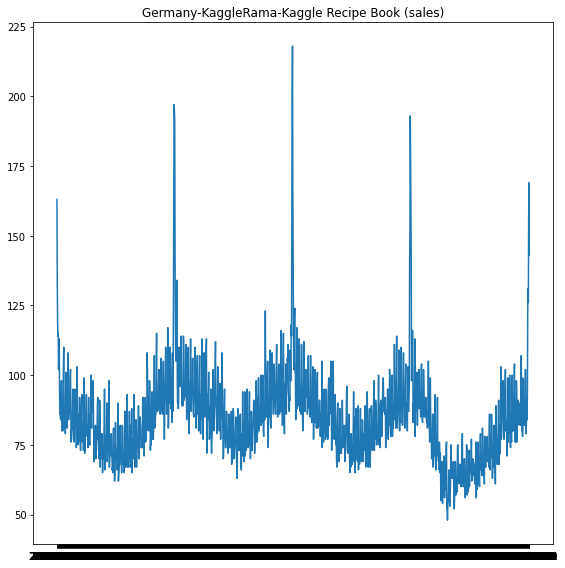

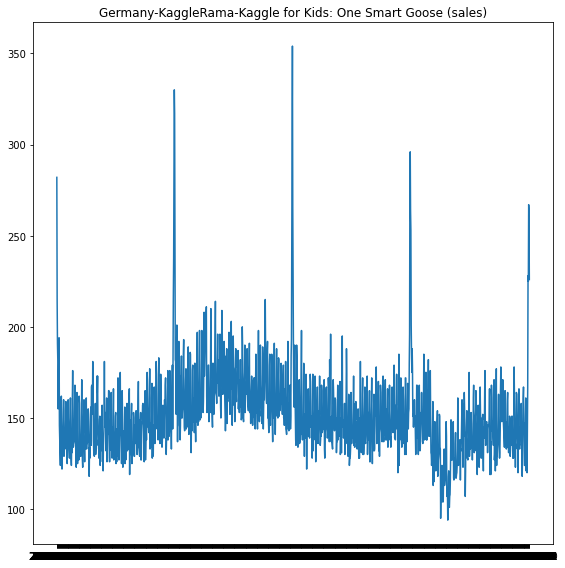

Italy
Italy KaggleMart


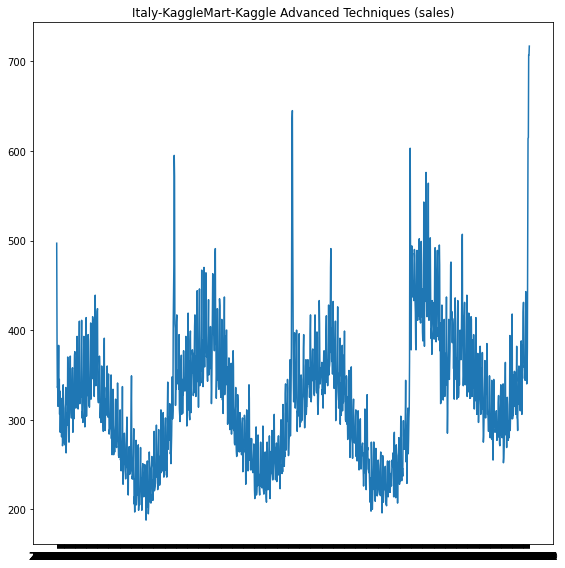

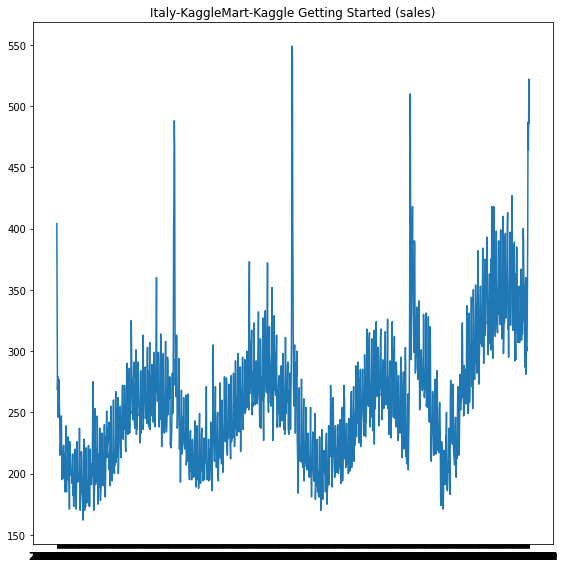

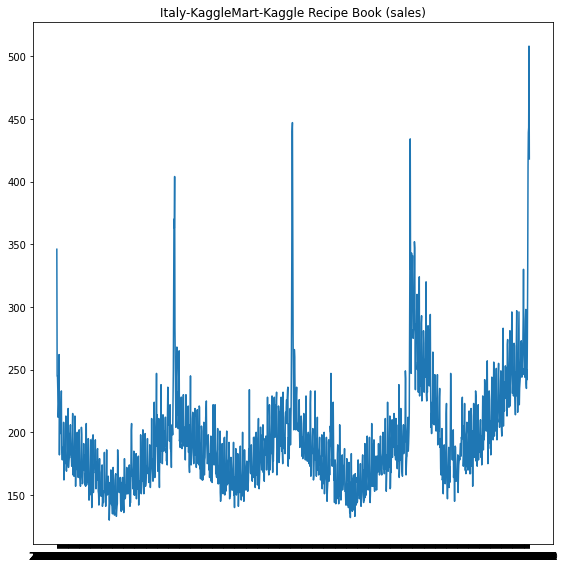

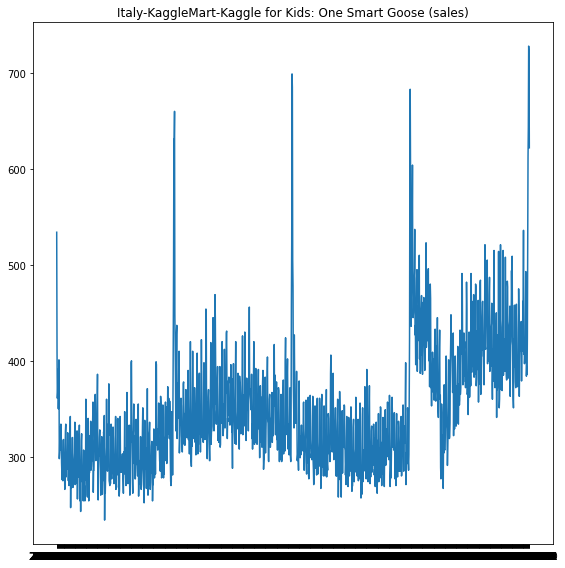

Italy KaggleRama


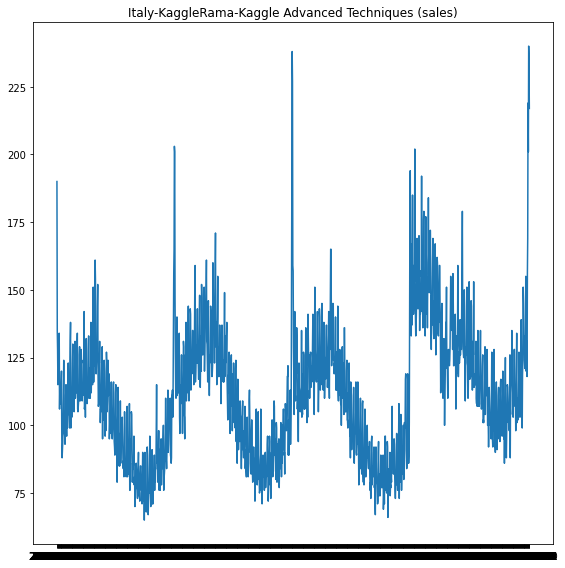

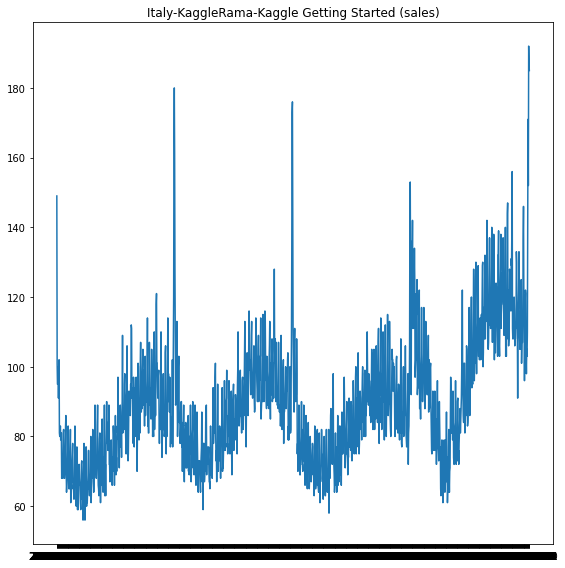

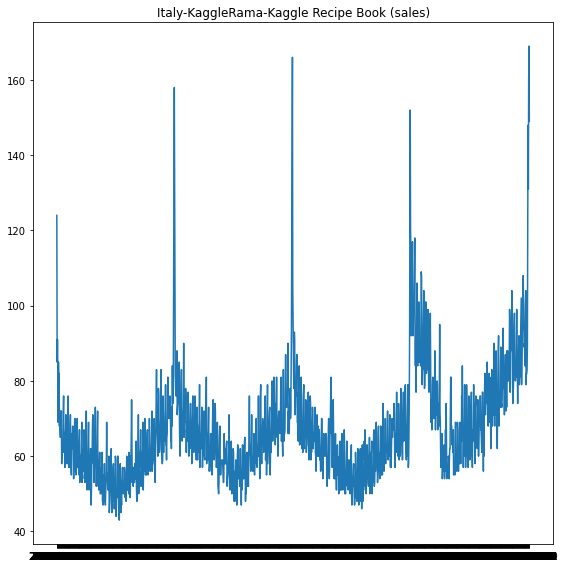

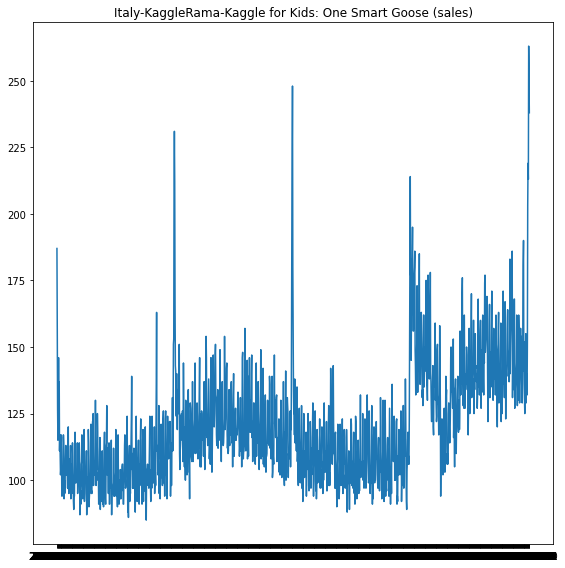

Poland
Poland KaggleMart


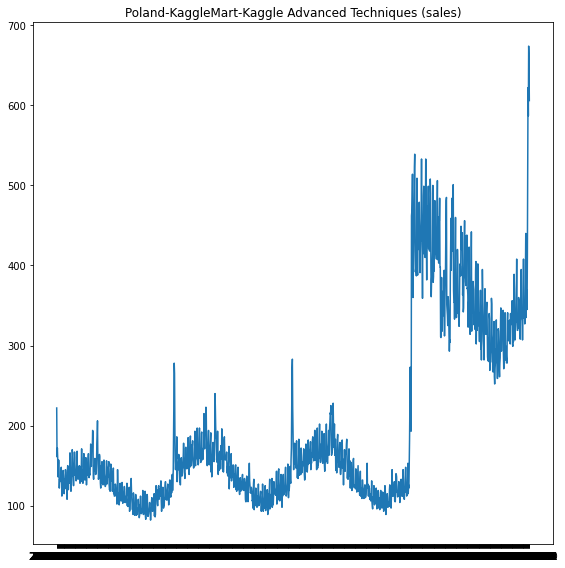

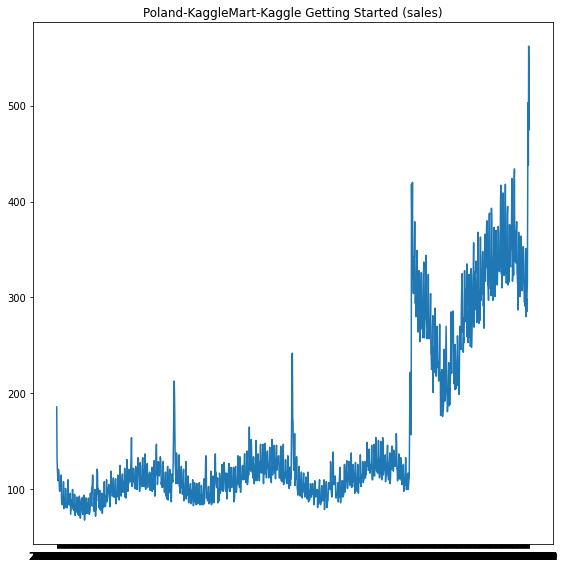

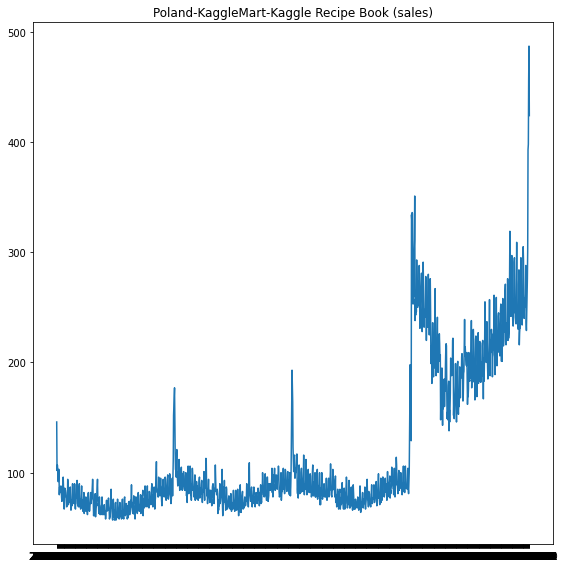

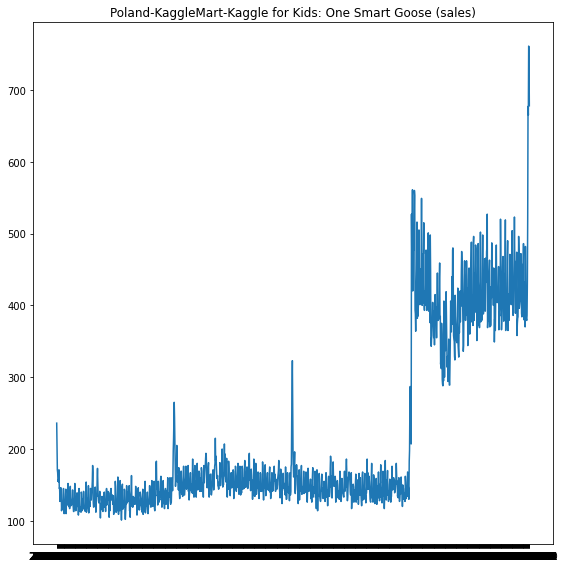

Poland KaggleRama


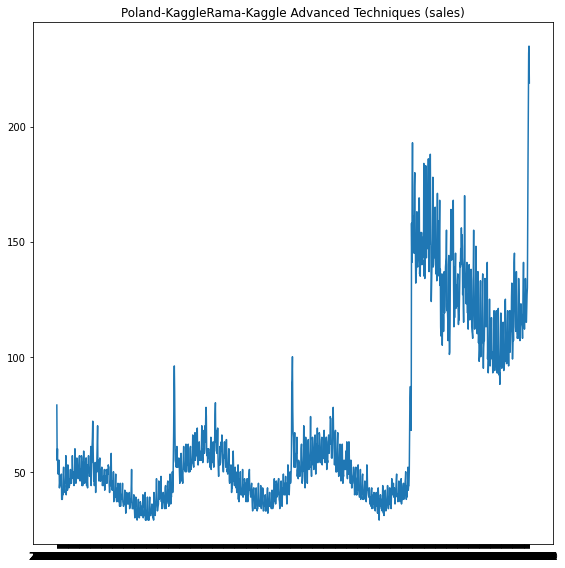

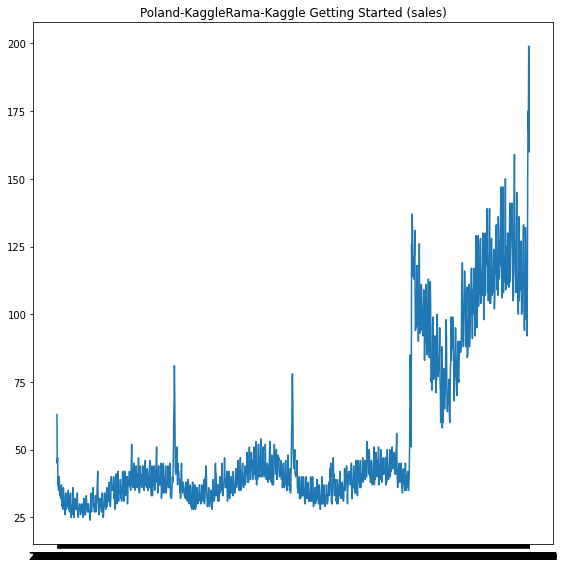

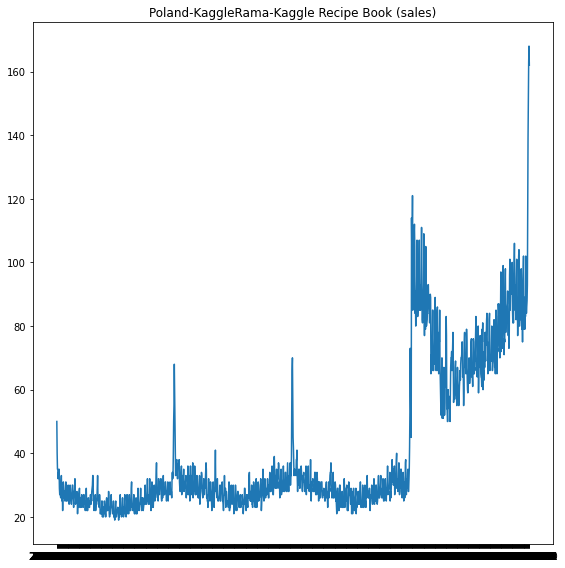

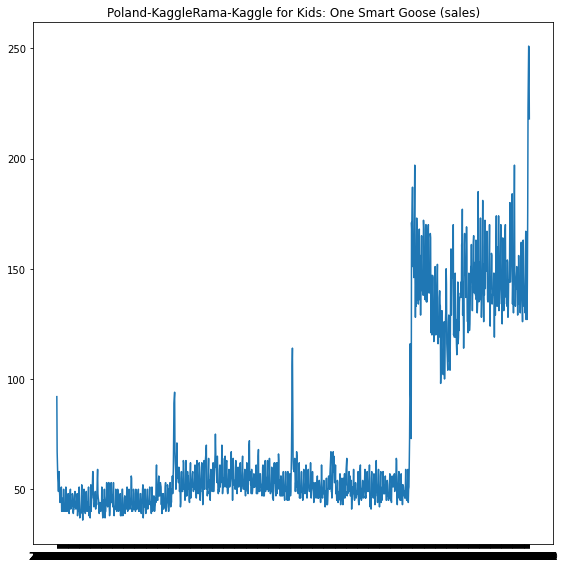

Spain
Spain KaggleMart


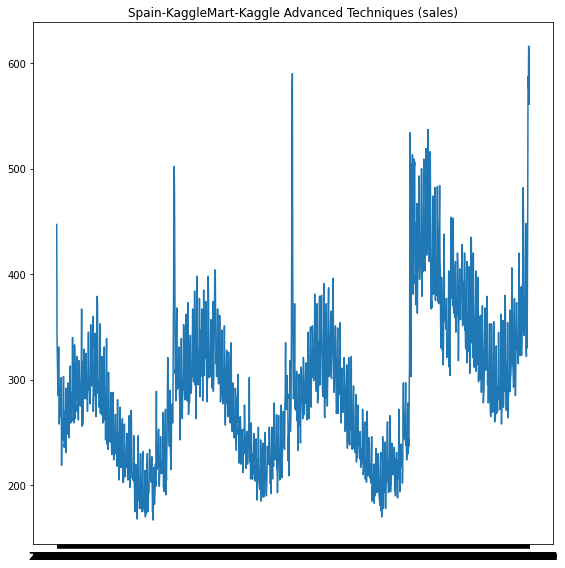

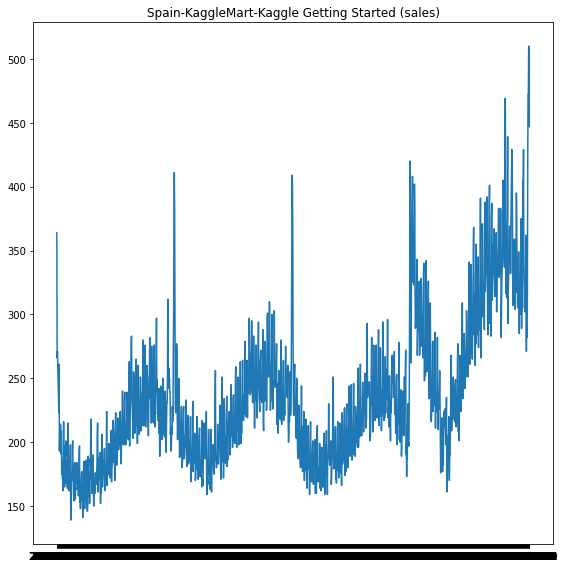

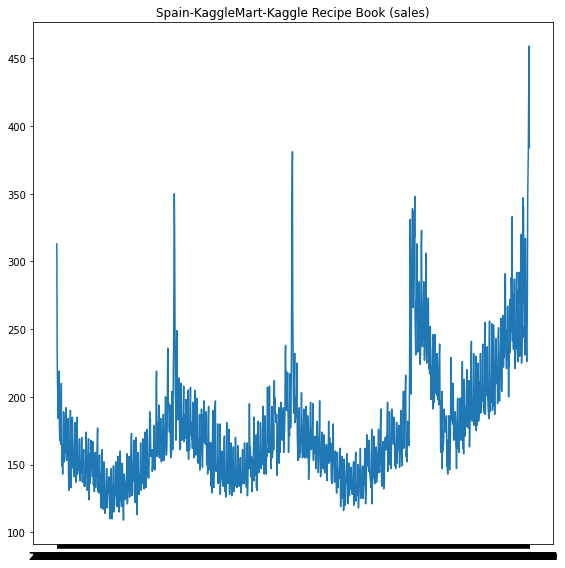

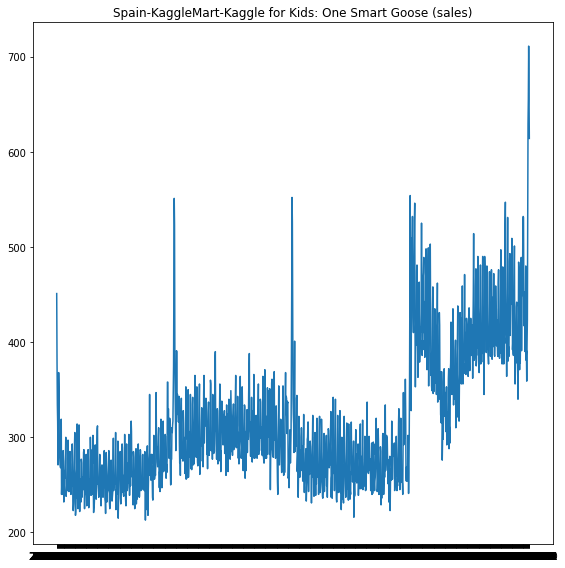

Spain KaggleRama


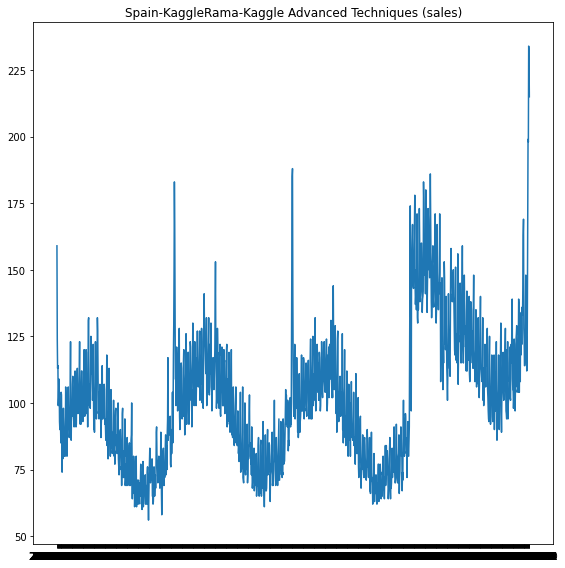

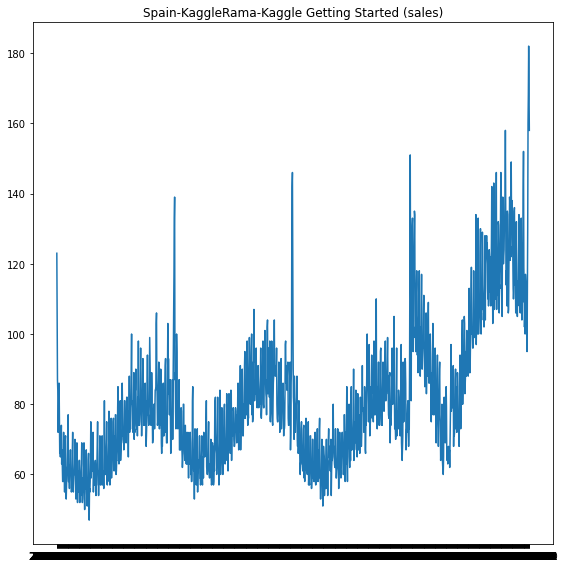

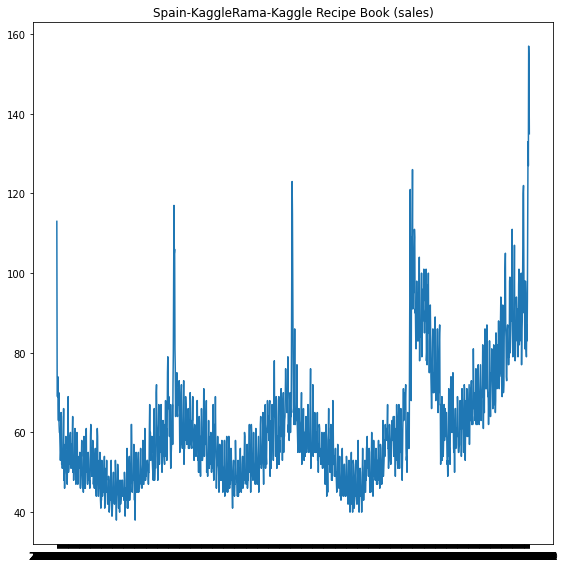

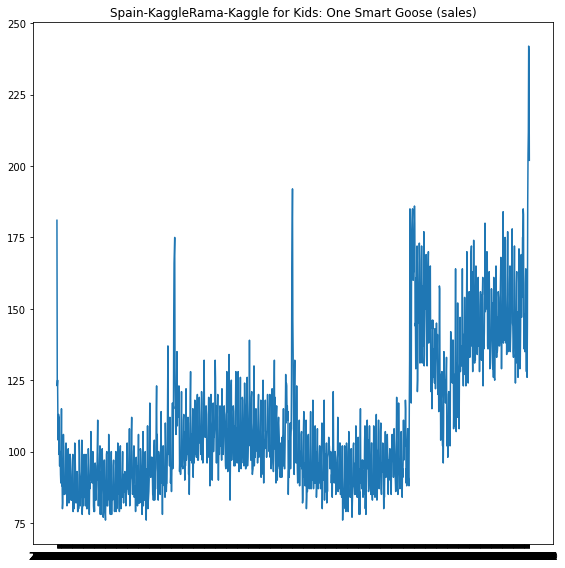

In [20]:
for country in train_df['country'].unique():
    
    temp_df = train_df[train_df['country']==country]
    
    print(country)
    
    for store in temp_df['store'].unique():
        
        print(country, store)
        
        for i, product in enumerate(temp_df[temp_df['store']==store]['product'].unique()):
        
            #plt.subplot(temp_df[temp_df['store']==store]['product'].nunique(), 1, i+1)
            
            plt.figure(figsize=(8,8))
            
            plt.plot(temp_df[(temp_df['store']==store)&(temp_df['product']==product)]['date'], 
                     temp_df[(temp_df['store']==store)&(temp_df['product']==product)]['num_sold'])
            
            plt.title(f'{country}-{store}-{product} (sales)')
            
            plt.tight_layout()
            
            plt.show()
            
        

In [22]:
train_df['num_sold'].describe()

count    70128.000000
mean       194.296986
std        126.893874
min         19.000000
25%         95.000000
50%        148.000000
75%        283.000000
max        986.000000
Name: num_sold, dtype: float64

In [24]:
train_df.groupby(['country', 'store', 'product']).agg({'num_sold': np.mean})

num_sold
country store      product                                     
Belgium KaggleMart Kaggle Advanced Techniques        405.895962
                   Kaggle Getting Started            325.649555
                   Kaggle Recipe Book                243.922656
                   Kaggle for Kids: One Smart Goose  437.316222
        KaggleRama Kaggle Advanced Techniques        140.880219
                   Kaggle Getting Started            113.041068
                   Kaggle Recipe Book                 84.738535
                   Kaggle for Kids: One Smart Goose  152.080767
France  KaggleMart Kaggle Advanced Techniques        366.978097
                   Kaggle Getting Started            294.089665
                   Kaggle Recipe Book                220.158795
                   Kaggle for Kids: One Smart Goose  395.650240
        KaggleRama Kaggle Advanced Techniques        127.389459
                   Kaggle Getting Started            101.869268
                   Kaggle Recipe Book                 76.188912
                   Kaggle for Kids: One Smart Goose  137.264203
Germany KaggleMart Kaggle Advanced Techniques        406.429158
                   Kaggle Getting Started            325.702259
                   Kaggle Recipe Book                244.533881
                   Kaggle for Kids: One Smart Goose  439.027379
        KaggleRama Kaggle Advanced Techniques        141.444216
                   Kaggle Getting Started            113.268309
                   Kaggle Recipe Book                 84.728268
                   Kaggle for Kids: One Smart Goose  152.063655
Italy   KaggleMart Kaggle Advanced Techniques        321.937029
                   Kaggle Getting Started            257.516769
                   Kaggle Recipe Book                192.754278
                   Kaggle for Kids: One Smart Goose  346.918549
        KaggleRama Kaggle Advanced Techniques        111.344969
                   Kaggle Getting Started             89.260096
                   Kaggle Recipe Book                 66.808350
                   Kaggle for Kids: One Smart Goose  120.025325
Poland  KaggleMart Kaggle Advanced Techniques        195.466119
                   Kaggle Getting Started            156.626283
                   Kaggle Recipe Book                117.302533
                   Kaggle for Kids: One Smart Goose  212.738535
        KaggleRama Kaggle Advanced Techniques         67.574264
                   Kaggle Getting Started             54.306639
                   Kaggle Recipe Book                 40.559890
                   Kaggle for Kids: One Smart Goose   73.663244
Spain   KaggleMart Kaggle Advanced Techniques        292.252567
                   Kaggle Getting Started            234.632444
                   Kaggle Recipe Book                175.963039
                   Kaggle for Kids: One Smart Goose  315.420945
        KaggleRama Kaggle Advanced Techniques        101.333333
                   Kaggle Getting Started             81.130732
                   Kaggle Recipe Book                 60.702943
                   Kaggle for Kids: One Smart Goose  109.705681

In [25]:
train_df.head()

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [26]:
train_df['date_dt'] = pd.to_datetime(train_df['date'])
train_df.head()

,row_id,date,country,store,product,num_sold,date_dt
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017-01-01
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,2017-01-01
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,2017-01-01
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,2017-01-01
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,2017-01-01


In [27]:
train_df['year_num'] = train_df['date_dt'].dt.year
train_df['month_num'] = train_df['date_dt'].dt.month
train_df['day_num'] = train_df['date_dt'].dt.day

train_df.head()

,row_id,date,country,store,product,num_sold,date_dt,year_num,month_num,day_num
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017-01-01,2017,1,1
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,2017-01-01,2017,1,1
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,2017-01-01,2017,1,1
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,2017-01-01,2017,1,1
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,2017-01-01,2017,1,1


In [39]:
import holidays
from datetime import date

In [45]:
belgium_holidays = holidays.country_holidays('BE', years=[2017, 2018, 2019, 2020, 2021])
german_holidays = holidays.country_holidays('DE', years=[2017, 2018, 2019, 2020, 2021])
spanish_holidays = holidays.country_holidays('ES', years=[2017, 2018, 2019, 2020, 2021])
polish_holidays = holidays.country_holidays('PL', years=[2017, 2018, 2019, 2020, 2021])
french_holidays = holidays.country_holidays('FR', years=[2017, 2018, 2019, 2020, 2021])
italian_holidays = holidays.country_holidays('IT', years=[2017, 2018, 2019, 2020, 2021])

In [47]:
#for val in italian_holidays.items():
    #print(val)

In [54]:
belgium_holiday_df = pd.DataFrame(belgium_holidays.items())
belgium_holiday_df.columns = ['date', 'holiday_name']
belgium_holiday_df.head()

,date,holiday_name
0,2017-01-01,Nieuwjaarsdag
1,2017-04-16,Pasen
2,2017-04-17,Paasmaandag
3,2017-05-25,O.L.H. Hemelvaart
4,2017-06-04,Pinksteren


In [52]:
#belgium_holiday_df.info()

In [53]:
german_holiday_df = pd.DataFrame(german_holidays.items())
german_holiday_df.columns = ['date', 'holiday_name']

spanish_holiday_df = pd.DataFrame(spanish_holidays.items())
spanish_holiday_df.columns = ['date', 'holiday_name']

polish_holiday_df = pd.DataFrame(polish_holidays.items())
polish_holiday_df.columns = ['date', 'holiday_name']

french_holiday_df = pd.DataFrame(french_holidays.items())
french_holiday_df.columns = ['date', 'holiday_name']

italian_holiday_df = pd.DataFrame(italian_holidays.items())
italian_holiday_df.columns = ['date', 'holiday_name']

In [104]:
for holiday in belgium_holiday_df['holiday_name'].unique():
    
    train_df[f'BE_holiday_{holiday}'] = 0

In [56]:
train_df.head()

,row_id,date,country,store,product,num_sold,date_dt,year_num,month_num,day_num,...,BE_holiday_Paasmaandag,BE_holiday_O.L.H. Hemelvaart,BE_holiday_Pinksteren,BE_holiday_Pinkstermaandag,BE_holiday_Dag van de Arbeid,BE_holiday_Nationale feestdag,BE_holiday_O.L.V. Hemelvaart,BE_holiday_Allerheiligen,BE_holiday_Wapenstilstand,BE_holiday_Kerstmis
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,0,0,0
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,0,0,0
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,0,0,0


In [97]:
for holiday in german_holiday_df['holiday_name'].unique():
    
    train_df[f'GE_holiday_{holiday}'] = 0
    
for holiday in polish_holiday_df['holiday_name'].unique():
    
    train_df[f'PO_holiday_{holiday}'] = 0
    
for holiday in spanish_holiday_df['holiday_name'].unique():
    
    train_df[f'SP_holiday_{holiday}'] = 0
    
for holiday in french_holiday_df['holiday_name'].unique():
    
    train_df[f'FR_holiday_{holiday}'] = 0
    
for holiday in italian_holiday_df['holiday_name'].unique():
    
    train_df[f'IT_holiday_{holiday}'] = 0

In [98]:
train_df.head()

,row_id,date,country,store,product,num_sold,date_dt,year_num,month_num,day_num,...,IT_Holiday_Natale,GE_Holiday_Zweiter Weihnachtstag,PO_Holiday_Boże Narodzenie (drugi dzień),IT_Holiday_Santo Stefano,SP_Holiday_Año nuevo,PO_Holiday_Narodowe Święto Niepodległości - 100-lecie,SP_Holiday_Epifanía del Señor (Trasladado),SP_Holiday_La Inmaculada Concepción (Trasladado),SP_Holiday_Todos los Santos (Trasladado),SP_Holiday_Día de la Constitución Española (Trasladado)
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017-01-01,2017,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,2017-01-01,2017,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,2017-01-01,2017,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,2017-01-01,2017,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,2017-01-01,2017,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
str(belgium_holiday_df.loc[0, 'date'])

'2017-01-01'

In [100]:
train_df.loc[0, 'date']

'2017-01-01'

In [105]:
drop_cols = [col for col in train_df.columns if '_Holiday_' in col]
#drop_cols

In [106]:
train_df = train_df.drop(columns=drop_cols, axis=1)
train_df.head()

,row_id,date,country,store,product,num_sold,date_dt,year_num,month_num,day_num,...,IT_holiday_Pasqua di Resurrezione,IT_holiday_Lunedì dell'Angelo,IT_holiday_Festa della Liberazione,IT_holiday_Festa dei Lavoratori,IT_holiday_Festa della Repubblica,IT_holiday_Assunzione della Vergine,IT_holiday_Tutti i Santi,IT_holiday_Immacolata Concezione,IT_holiday_Natale,IT_holiday_Santo Stefano
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,0,0,0
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,0,0,0
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,0,0,0


In [107]:
for i in range(len(train_df)):
    
    for j1 in range(len(belgium_holiday_df)):
        
        be_date = str(belgium_holiday_df.loc[j1, 'date'])
        be_name = belgium_holiday_df.loc[j1, 'holiday_name']
        
        if str(train_df.loc[i, 'date']) == be_date:
            
            train_df.loc[i, f'BE_holiday_{be_name}'] = 1
            
    for j2 in range(len(german_holiday_df)):
        
        ge_date = str(german_holiday_df.loc[j2, 'date'])
        ge_name = german_holiday_df.loc[j2, 'holiday_name']
        
        if str(train_df.loc[i, 'date']) == ge_date:
            
            train_df.loc[i, f'GE_holiday_{ge_name}'] = 1
            
    for j3 in range(len(polish_holiday_df)):
        
        po_date = str(polish_holiday_df.loc[j3, 'date'])
        po_name = polish_holiday_df.loc[j3, 'holiday_name']
        
        if str(train_df.loc[i, 'date']) == po_date:
            
            train_df.loc[i, f'PO_holiday_{po_name}'] = 1
            
    for j4 in range(len(french_holiday_df)):
        
        fr_date = str(french_holiday_df.loc[j4, 'date'])
        fr_name = french_holiday_df.loc[j4, 'holiday_name']
        
        if str(train_df.loc[i, 'date']) == fr_date:
            
            train_df.loc[i, f'FR_holiday_{fr_name}'] = 1
            
    for j5 in range(len(spanish_holiday_df)):
        
        sp_date = str(spanish_holiday_df.loc[j5, 'date'])
        sp_name = spanish_holiday_df.loc[j5, 'holiday_name']
        
        if str(train_df.loc[i, 'date']) == sp_date:
            
            train_df.loc[i, f'SP_holiday_{sp_name}'] = 1
            
    for j6 in range(len(italian_holiday_df)):
        
        it_date = str(italian_holiday_df.loc[j6, 'date'])
        it_name = italian_holiday_df.loc[j6, 'holiday_name']
        
        if str(train_df.loc[i, 'date']) == it_date:
            
            train_df.loc[i, f'IT_holiday_{it_name}'] = 1

In [108]:
train_df.head()

,row_id,date,country,store,product,num_sold,date_dt,year_num,month_num,day_num,...,IT_holiday_Pasqua di Resurrezione,IT_holiday_Lunedì dell'Angelo,IT_holiday_Festa della Liberazione,IT_holiday_Festa dei Lavoratori,IT_holiday_Festa della Repubblica,IT_holiday_Assunzione della Vergine,IT_holiday_Tutti i Santi,IT_holiday_Immacolata Concezione,IT_holiday_Natale,IT_holiday_Santo Stefano
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,0,0,0
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,0,0,0
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,0,0,0


In [109]:
train_df[train_df.columns[-1]].value_counts()

0    69936
1      192
Name: IT_holiday_Santo Stefano, dtype: int64

In [110]:
train_df[train_df.columns[-5]].value_counts()

0    69936
1      192
Name: IT_holiday_Assunzione della Vergine, dtype: int64

In [111]:
train_df[train_df.columns[-11]].value_counts()

0    69936
1      192
Name: IT_holiday_Epifania del Signore, dtype: int64

In [112]:
#train_df = train_df.fillna(0)
train_df.isnull().sum().sum()

0

In [69]:
#train_df[train_df.columns[-11]].value_counts()

0.0    69936
1.0      192
Name: SP_Holiday_Navidad, dtype: int64

In [70]:
#train_df.head()

,row_id,date,country,store,product,num_sold,date_dt,year_num,month_num,day_num,...,IT_Holiday_Natale,GE_Holiday_Zweiter Weihnachtstag,PO_Holiday_Boże Narodzenie (drugi dzień),IT_Holiday_Santo Stefano,SP_Holiday_Año nuevo,PO_Holiday_Narodowe Święto Niepodległości - 100-lecie,SP_Holiday_Epifanía del Señor (Trasladado),SP_Holiday_La Inmaculada Concepción (Trasladado),SP_Holiday_Todos los Santos (Trasladado),SP_Holiday_Día de la Constitución Española (Trasladado)
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017-01-01,2017,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,2017-01-01,2017,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,2017-01-01,2017,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,2017-01-01,2017,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,2017-01-01,2017,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
#be_cols = [col for col in train_df.columns if col.startswith('BE')]
#be_cols

['BE_holiday_Nieuwjaarsdag',
 'BE_holiday_Pasen',
 'BE_holiday_Paasmaandag',
 'BE_holiday_O.L.H. Hemelvaart',
 'BE_holiday_Pinksteren',
 'BE_holiday_Pinkstermaandag',
 'BE_holiday_Dag van de Arbeid',
 'BE_holiday_Nationale feestdag',
 'BE_holiday_O.L.V. Hemelvaart',
 'BE_holiday_Allerheiligen',
 'BE_holiday_Wapenstilstand',
 'BE_holiday_Kerstmis',
 'BE_Holiday_Nieuwjaarsdag',
 'BE_Holiday_Pasen',
 'BE_Holiday_Paasmaandag',
 'BE_Holiday_Dag van de Arbeid',
 'BE_Holiday_O.L.H. Hemelvaart',
 'BE_Holiday_Pinksteren',
 'BE_Holiday_Pinkstermaandag',
 'BE_Holiday_Nationale feestdag',
 'BE_Holiday_O.L.V. Hemelvaart',
 'BE_Holiday_Allerheiligen',
 'BE_Holiday_Wapenstilstand',
 'BE_Holiday_Kerstmis']

In [113]:
train_df['BE_holiday_Kerstmis'].value_counts()

0    69936
1      192
Name: BE_holiday_Kerstmis, dtype: int64

In [79]:
#belgium_holiday_df

,date,holiday_name
0,2017-01-01,Nieuwjaarsdag
1,2017-04-16,Pasen
2,2017-04-17,Paasmaandag
3,2017-05-25,O.L.H. Hemelvaart
4,2017-06-04,Pinksteren
5,2017-06-05,Pinkstermaandag
6,2017-05-01,Dag van de Arbeid
7,2017-07-21,Nationale feestdag
8,2017-08-15,O.L.V. Hemelvaart
9,2017-11-01,Allerheiligen


In [114]:
train_df_dummies = train_df[['country', 'store', 'product']]

train_df_dummies_onehot = pd.get_dummies(train_df_dummies, drop_first=True)

train_df_dummies_onehot.head()

,country_France,country_Germany,country_Italy,country_Poland,country_Spain,store_KaggleRama,product_Kaggle Getting Started,product_Kaggle Recipe Book,product_Kaggle for Kids: One Smart Goose
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0


In [115]:
train_df_mod = pd.concat([train_df, train_df_dummies_onehot], axis=1)
train_df_mod.head(15)

,row_id,date,country,store,product,num_sold,date_dt,year_num,month_num,day_num,...,IT_holiday_Santo Stefano,country_France,country_Germany,country_Italy,country_Poland,country_Spain,store_KaggleRama,product_Kaggle Getting Started,product_Kaggle Recipe Book,product_Kaggle for Kids: One Smart Goose
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,1,0,0
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,0,1,0
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,0,0,1
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,2017-01-01,2017,1,1,...,0,0,0,0,0,0,1,0,0,0
5,5,2017-01-01,Belgium,KaggleRama,Kaggle Getting Started,187,2017-01-01,2017,1,1,...,0,0,0,0,0,0,1,1,0,0
6,6,2017-01-01,Belgium,KaggleRama,Kaggle Recipe Book,158,2017-01-01,2017,1,1,...,0,0,0,0,0,0,1,0,1,0
7,7,2017-01-01,Belgium,KaggleRama,Kaggle for Kids: One Smart Goose,267,2017-01-01,2017,1,1,...,0,0,0,0,0,0,1,0,0,1
8,8,2017-01-01,France,KaggleMart,Kaggle Advanced Techniques,610,2017-01-01,2017,1,1,...,0,1,0,0,0,0,0,0,0,0
9,9,2017-01-01,France,KaggleMart,Kaggle Getting Started,463,2017-01-01,2017,1,1,...,0,1,0,0,0,0,0,1,0,0


In [116]:
train_df_mod['dayofweek'] = train_df_mod['date_dt'].dt.dayofweek
train_df_mod['dayofweek'].head()

0    6
1    6
2    6
3    6
4    6
Name: dayofweek, dtype: int64

In [117]:
train_df_mod['is_weekend'] = train_df_mod['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

train_df_mod[['is_weekend', 'dayofweek']].head()

,is_weekend,dayofweek
0,1,6
1,1,6
2,1,6
3,1,6
4,1,6


In [124]:
train_df_mod['covid_effect'] = 0

for i in range(len(train_df_mod)):
    if train_df_mod.loc[i, 'year_num'] >= 2020 and train_df_mod.loc[i, 'month_num'] >= 3:
        train_df_mod.loc[i, 'covid_effect'] = 1


In [127]:
#train_df_mod['covid_effect'].tail()

In [128]:
train_df_mod.head()

,row_id,date,country,store,product,num_sold,date_dt,year_num,month_num,day_num,...,country_Italy,country_Poland,country_Spain,store_KaggleRama,product_Kaggle Getting Started,product_Kaggle Recipe Book,product_Kaggle for Kids: One Smart Goose,dayofweek,is_weekend,covid_effect
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,6,1,0
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,2017-01-01,2017,1,1,...,0,0,0,0,1,0,0,6,1,0
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,2017-01-01,2017,1,1,...,0,0,0,0,0,1,0,6,1,0
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,2017-01-01,2017,1,1,...,0,0,0,0,0,0,1,6,1,0
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,2017-01-01,2017,1,1,...,0,0,0,1,0,0,0,6,1,0


In [129]:
#play = train_df_mod['date_dt']
#play

0       2017-01-01
1       2017-01-01
2       2017-01-01
3       2017-01-01
4       2017-01-01
           ...    
70123   2020-12-31
70124   2020-12-31
70125   2020-12-31
70126   2020-12-31
70127   2020-12-31
Name: date_dt, Length: 70128, dtype: datetime64[ns]

In [131]:
#play - pd.Timedelta(days=1)

0       2016-12-31
1       2016-12-31
2       2016-12-31
3       2016-12-31
4       2016-12-31
           ...    
70123   2020-12-30
70124   2020-12-30
70125   2020-12-30
70126   2020-12-30
70127   2020-12-30
Name: date_dt, Length: 70128, dtype: datetime64[ns]

In [134]:
#play.loc[0] - pd.Timedelta(days=1)

Timestamp('2016-12-31 00:00:00')

In [143]:
#type(play.loc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [132]:
train_copy = train_df_mod.copy()
train_copy.head()

,row_id,date,country,store,product,num_sold,date_dt,year_num,month_num,day_num,...,country_Italy,country_Poland,country_Spain,store_KaggleRama,product_Kaggle Getting Started,product_Kaggle Recipe Book,product_Kaggle for Kids: One Smart Goose,dayofweek,is_weekend,covid_effect
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,6,1,0
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,2017-01-01,2017,1,1,...,0,0,0,0,1,0,0,6,1,0
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,2017-01-01,2017,1,1,...,0,0,0,0,0,1,0,6,1,0
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,2017-01-01,2017,1,1,...,0,0,0,0,0,0,1,6,1,0
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,2017-01-01,2017,1,1,...,0,0,0,1,0,0,0,6,1,0


In [138]:
for idx in range(1, 16):
    
    train_copy[f'lag_{idx}'] = 0
    
train_copy.head()

,row_id,date,country,store,product,num_sold,date_dt,year_num,month_num,day_num,...,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,0,0,0
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,0,0,0
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,0,0,0


In [137]:
#train_copy = train_copy.drop('lag_70127', axis=1)

In [140]:
#train_copy['date_dt'].min()

Timestamp('2017-01-01 00:00:00')

In [147]:
#train_copy.loc[0, 'country'][

'B'

In [155]:
for i in range(len(train_copy)):
    for j in range(1, 16):
    
        lag_date = train_copy.loc[i, 'date_dt'] - pd.Timedelta(days=j)
        country = train_copy.loc[i, 'country']
        store = train_copy.loc[i, 'store']
        product = train_copy.loc[i, 'product']
        
        if lag_date >= train_copy['date_dt'].min():
            
            lag_sales = train_copy.loc[((train_copy['date_dt']==lag_date)&(train_copy['country']==country)&(train_copy['store']==store)&(train_copy['product']==product)), 'num_sold'].values
            
            train_copy.loc[i, f'lag_{j}'] = lag_sales[0]
            
        else:
            
            lag_sales = np.nan
            
            train_copy.loc[i, f'lag_{j}'] = lag_sales
            
            
        #train_copy.loc[i, f'lag_{j}'] = lag_sales
    
    
    

KeyboardInterrupt: 

In [ ]:
train_copy.head(30)

In [ ]:
for idx in [30, 90, 180, 270, 365]:
    
    train_copy[f'lag_{idx}'] = 0

In [ ]:
for i in range(len(train_copy)):
    for j in [30, 90, 180, 270, 365]:
    
        lag_date = train_copy.loc[i, 'date_dt'] - pd.Timedelta(days=j)
        country = train_copy.loc[i, 'country']
        store = train_copy.loc[i, 'store']
        product = train_copy.loc[i, 'product']
        
        if lag_date >= train_copy['date_dt'].min():
            
            lag_sales = train_copy.loc[((train_copy['date_dt']==lag_date)&(train_copy['country']==country)&(train_copy['store']==store)&(train_copy['product']==product)), 'num_sold'].values
            
            train_copy.loc[i, f'lag_{j}'] = lag_sales[0]
            
        else:
            
            lag_sales = np.nan
            
            train_copy.loc[i, f'lag_{j}'] = lag_sales

In [ ]:
train_copy.tail(30)

In [ ]:
for col in train_copy.columns:
    print(col)

In [ ]:
cols_to_drop = ['row_id', 'date', 'country', 'store', 'product',
               'date_dt', ]

In [ ]:
train_copy_final = train_copy.dropna()

In [ ]:
train_copy_final = train_copy_final.drop(columns=cols_to_drop, axis=1)

In [ ]:
train_set = train_copy_final.loc[((train_copy_final['year_num']<=2020)&(train_copy_final['month_num']<=9))|(train_copy_final['year_num']<=2019)]

val_set = train_copy_final.loc[(train_copy_final['year_num']==2020)&(train_copy_final['month_num']>9)]

In [ ]:
train_set.shape

In [ ]:
val_set.shape

In [ ]:
X_train = train_set.drop('num_sold', axis=1)
y_train = train_set['num_sold']

X_val = val_set.drop('num_sold', axis=1)
y_val = val_set['num_sold']

In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
xgb_model = XGBRegressor()
lgbm_model = LGBMRegressor()
rf_model = RandomForestRegressor()

In [ ]:
xgb_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

In [ ]:
xgb_preds = xgb_model.predict(X_val)
lgbm_preds = lgbm_model.predict(X_val)
rf_preds = rf_model.predict(X_val)

In [ ]:
print(np.mean((y_val - xgb_preds)**2))

In [ ]:
print(np.mean((y_val - lgbm_preds)**2))

In [ ]:
print(np.mean((y_val - rf_preds)**2))

In [ ]:
xgb_model = XGBRegressor()
lgbm_model = LGBMRegressor()
rf_model = RandomForestRegressor()

In [ ]:
X_final = train_copy_final.drop('num_sold', axis=1)
y_final = train_copy_final.

In [ ]:
xgb_model.fit(X_final, y_final)
lgbm_model.fit(X_final, y_final)
rf_model.fit(X_final, y_final)

In [ ]:
test_df['date_dt'] = pd.to_datetime(test_df['date'])

test_df['year_num'] = test_df['date_dt'].dt.year
test_df['month_num'] = test_df['date_dt'].dt.month
test_df['day_num'] = test_df['date_dt'].dt.day

In [ ]:
for holiday in belgium_holiday_df['holiday_name'].unique():
    
    test_df[f'BE_holiday_{holiday}'] = 0
    
for holiday in german_holiday_df['holiday_name'].unique():
    
    test_df[f'GE_holiday_{holiday}'] = 0
    
for holiday in polish_holiday_df['holiday_name'].unique():
    
    test_df[f'PO_holiday_{holiday}'] = 0
    
for holiday in spanish_holiday_df['holiday_name'].unique():
    
    test_df[f'SP_holiday_{holiday}'] = 0
    
for holiday in french_holiday_df['holiday_name'].unique():
    
    test_df[f'FR_holiday_{holiday}'] = 0
    
for holiday in italian_holiday_df['holiday_name'].unique():
    
    test_df[f'IT_holiday_{holiday}'] = 0

In [ ]:
for i in range(len(test_df)):
    
    for j1 in range(len(belgium_holiday_df)):
        
        be_date = str(belgium_holiday_df.loc[j1, 'date'])
        be_name = belgium_holiday_df.loc[j1, 'holiday_name']
        
        if str(test_df.loc[i, 'date']) == be_date:
            
            test_df.loc[i, f'BE_holiday_{be_name}'] = 1
            
    for j2 in range(len(german_holiday_df)):
        
        ge_date = str(german_holiday_df.loc[j2, 'date'])
        ge_name = german_holiday_df.loc[j2, 'holiday_name']
        
        if str(test_df.loc[i, 'date']) == ge_date:
            
            test_df.loc[i, f'GE_holiday_{ge_name}'] = 1
            
    for j3 in range(len(polish_holiday_df)):
        
        po_date = str(polish_holiday_df.loc[j3, 'date'])
        po_name = polish_holiday_df.loc[j3, 'holiday_name']
        
        if str(test_df.loc[i, 'date']) == po_date:
            
            test_df.loc[i, f'PO_holiday_{po_name}'] = 1
            
    for j4 in range(len(french_holiday_df)):
        
        fr_date = str(french_holiday_df.loc[j4, 'date'])
        fr_name = french_holiday_df.loc[j4, 'holiday_name']
        
        if str(test_df.loc[i, 'date']) == fr_date:
            
            test_df.loc[i, f'FR_holiday_{fr_name}'] = 1
            
    for j5 in range(len(spanish_holiday_df)):
        
        sp_date = str(spanish_holiday_df.loc[j5, 'date'])
        sp_name = spanish_holiday_df.loc[j5, 'holiday_name']
        
        if str(test_df.loc[i, 'date']) == sp_date:
            
            test_df.loc[i, f'SP_holiday_{sp_name}'] = 1
            
    for j6 in range(len(italian_holiday_df)):
        
        it_date = str(italian_holiday_df.loc[j6, 'date'])
        it_name = italian_holiday_df.loc[j6, 'holiday_name']
        
        if str(test_df.loc[i, 'date']) == it_date:
            
            test_df.loc[i, f'IT_holiday_{it_name}'] = 1

In [ ]:
test_df_dummies = test_df[['country', 'store', 'product']]

test_df_dummies_onehot = pd.get_dummies(test_df_dummies, drop_first=True)

In [ ]:
test_df_mod = pd.concat([test_df, test_df_dummies_onehot], axis=1)
test_df_mod.head(15)

In [ ]:
test_df_mod['dayofweek'] = test_df_mod['date_dt'].dt.dayofweek

test_df_mod['is_weekend'] = test_df_mod['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

In [ ]:
test_df_mod['covid_effect'] = 0

In [ ]:
test_copy = test_df_mod.copy()

test_copy.head()

In [ ]:
for idx in range(1, 16):
    
    test_copy[f'lag_{idx}'] = 0

In [ ]:
for idx in [30, 90, 180, 270, 365]:
    
    train_copy[f'lag_{idx}'] = 0

In [ ]:
test_copy = test_copy[train_copy_final.columns]
test_copy.head()

In [ ]:
df_combo = pd.concat([train_copy_final, test_copy], axis=0, ignore_index=True)
df_combo.head()

In [ ]:
for i in range(len(train_copy), len(df_combo)):
    for j in list(range(1, 16)) + [30, 90, 180, 270, 365]:
    
        lag_date = train_copy.loc[i, 'date_dt'] - pd.Timedelta(days=j)
        country = train_copy.loc[i, 'country']
        store = train_copy.loc[i, 'store']
        product = train_copy.loc[i, 'product']
        
        if lag_date >= train_copy['date_dt'].min():
            
            lag_sales = train_copy.loc[((train_copy['date_dt']==lag_date)&(train_copy['country']==country)&(train_copy['store']==store)&(train_copy['product']==product)), 'num_sold'].values
            
            train_copy.loc[i, f'lag_{j}'] = lag_sales[0]
            
        else:
            
            lag_sales = np.nan
            
            train_copy.loc[i, f'lag_{j}'] = lag_sales

In [ ]:
df_test_final = df_combo.iloc[len(train_copy_final):, :]
df_test_final.head()

In [ ]:
#pred_first_test = xgb_model.predict(df_test_final.iloc[0])

In [ ]:
first_day_preds = xgb_model.predict(df_test_final.loc[((df_test_final['month_num']==1)&(df_test_final['day_num']==1)), :])
   
for i in range(1, 16):
    
    df_test_final.loc[((df_test_final['month_num']==1)&(df_test_final['day_num']==i+1)), f'lag_{i}'] = first_day_preds
    
    next_day_preds = xgb_model.predict(df_test_final.loc[((df_test_final['month_num']==1)&(df_test_final['day_num']==i+1)), :])
    
    first_day_preds = next_day_preds
        
    